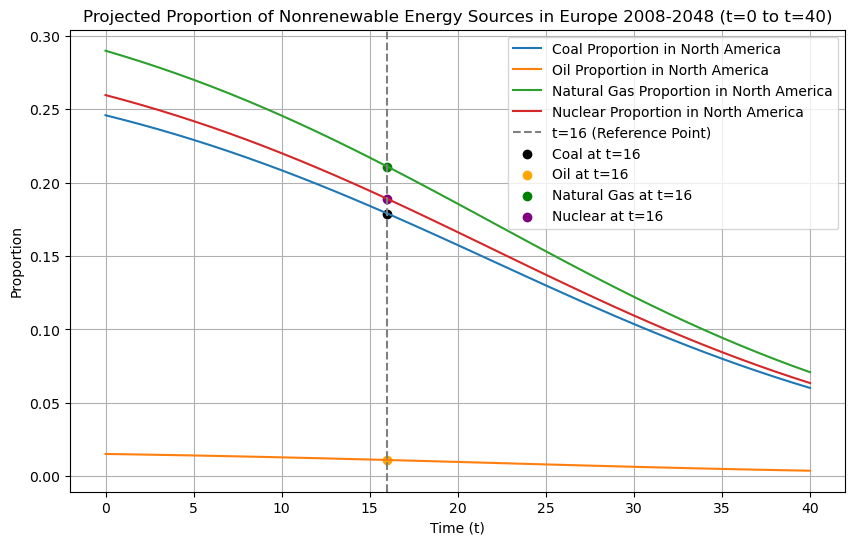

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function (for renewable sources)
L = 1.0  # Saturation level for the logistic function
k = 0.07525293  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 41)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions_renewable = {
    "Hydropower": 0.147,
    "Solar": 0.063,
    "Wind": 0.137,
    "Biofuel": 0.042
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions_renewable.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Initial proportions for each nonrenewable at t=16
initial_proportions_nonrenewable = {
    "Coal": 0.179,
    "Oil": 0.011,
    "Natural Gas": 0.211,
    "Nuclear": 0.189
}

# Dictionary to store each nonrenewable's proportion over time
nonrenewable_proportions = {}

# Calculate the proportion over time for each nonrenewable source
for source, initial_value in initial_proportions_nonrenewable.items():
    # Initialize the proportion array for this nonrenewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_prev = sum(renewable_proportions[renewable][time - 1] for renewable in renewable_proportions)
        
        nonrenewable_sum_prev = 1 - renewable_sum_prev  # Total nonrenewable at t-1

        # Apply the recursive formula
        proportions[time] = (1 - renewable_sum) / nonrenewable_sum_prev * proportions[time - 1]

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_next = sum(renewable_proportions[renewable][time + 1] for renewable in renewable_proportions)
        
        nonrenewable_sum = 1 - renewable_sum  # Total nonrenewable at t+1

        # Apply the reverse recursive formula
        proportions[time] = nonrenewable_sum / (1 - renewable_sum_next) * proportions[time + 1]

    # Store the calculated proportions in the dictionary
    nonrenewable_proportions[source] = proportions

# Plotting the nonrenewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in nonrenewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions_nonrenewable["Coal"], color='black', label='Coal at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Oil"], color='orange', label='Oil at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Natural Gas"], color='green', label='Natural Gas at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Nuclear"], color='purple', label='Nuclear at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Nonrenewable Energy Sources in Europe 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("NonrenewableLogisticEurope.png")
plt.show()


In [3]:
renewable_proportions

{'Hydropower': array([0.06059813, 0.06452558, 0.0686525 , 0.0729819 , 0.07751588,
        0.08225554, 0.08720088, 0.09235067, 0.09770236, 0.10325204,
        0.10899433, 0.11492233, 0.12102764, 0.12730028, 0.13372877,
        0.14030013, 0.147     , 0.15381268, 0.16072132, 0.16770803,
        0.17475405, 0.18183999, 0.18894601, 0.19605203, 0.20313797,
        0.210184  , 0.2171707 , 0.22407934, 0.23089202, 0.23759189,
        0.24416325, 0.25059174, 0.25686438, 0.26296969, 0.2688977 ,
        0.27463998, 0.28018966, 0.28554136, 0.29069114, 0.29563648,
        0.30037615]),
 'Solar': array([0.02597063, 0.02765382, 0.0294225 , 0.03127796, 0.03322109,
        0.03525238, 0.03737181, 0.03957886, 0.04187244, 0.04425087,
        0.04671185, 0.04925243, 0.05186899, 0.05455726, 0.05731233,
        0.06012863, 0.063     , 0.06591972, 0.06888057, 0.07187487,
        0.07489459, 0.07793143, 0.08097686, 0.0840223 , 0.08705913,
        0.09007886, 0.09307316, 0.096034  , 0.09895372, 0.1018251 ,
   

In [5]:
nonrenewable_proportions

{'Coal': array([0.24598341, 0.24293864, 0.23973922, 0.23638284, 0.23286785,
        0.22919341, 0.22535951, 0.22136712, 0.2172182 , 0.21291579,
        0.20846405, 0.20386834, 0.19913518, 0.19427229, 0.18928858,
        0.1841941 , 0.179     , 0.17371844, 0.16836249, 0.16294602,
        0.15748356, 0.15199015, 0.14648118, 0.14097221, 0.1354788 ,
        0.13001635, 0.12459988, 0.11924392, 0.11396236, 0.10876826,
        0.10367379, 0.09869007, 0.09382718, 0.08909402, 0.08449831,
        0.08004658, 0.07574416, 0.07159524, 0.06760285, 0.06376896,
        0.06009451]),
 'Oil': array([0.0151163 , 0.01492919, 0.01473258, 0.01452632, 0.01431032,
        0.01408451, 0.01384891, 0.01360357, 0.0133486 , 0.01308421,
        0.01281064, 0.01252822, 0.01223736, 0.01193852, 0.01163226,
        0.01131919, 0.011     , 0.01067543, 0.0103463 , 0.01001344,
        0.00967776, 0.00934018, 0.00900164, 0.0086631 , 0.00832551,
        0.00798983, 0.00765698, 0.00732784, 0.00700327, 0.00668408,
        0.0